In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable
from torchvision import datasets, transforms

In [2]:
# Hyper parameters
EPOCH = 10
BATCH_SIZE = 64
LR_G = 0.0001
LR_D = 0.0001

In [3]:
# GPU
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print('GPU State:', device)
# device = 'cpu'

transform = transforms.ToTensor()
data_train = datasets.MNIST(root="./mnist",
                            transform=transform,
                            train=True,
                            download=True)
data_loader = torch.utils.data.DataLoader(dataset=data_train, batch_size=BATCH_SIZE, shuffle=True)

GPU State: cuda:0


Extracting ./mnist\MNIST\raw\train-images-idx3-ubyte.gz to ./mnist\MNIST\raw


Extracting ./mnist\MNIST\raw\train-labels-idx1-ubyte.gz to ./mnist\MNIST\raw


Extracting ./mnist\MNIST\raw\t10k-images-idx3-ubyte.gz to ./mnist\MNIST\raw


Extracting ./mnist\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./mnist\MNIST\raw
Processing...
Done!


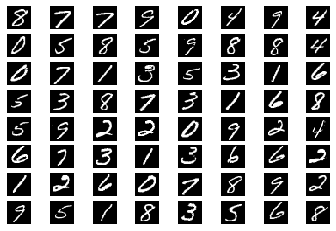

In [4]:
def showImg(imgs):
    sqrtn = int(np.ceil(np.sqrt(imgs.shape[0])))
    for index, img in enumerate(imgs):
        plt.subplot(sqrtn, sqrtn, index+1)
        plt.imshow(img.reshape(28, 28), 'gray')
        plt.axis(False)
    plt.show()
showImg(data_loader.dataset.data[-64:])

In [5]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(100+10, 256),    # 100+10
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 784)
        )
        
        self.label_emb = nn.Embedding(10, 10)

    def forward(self, z, label):
        label = self.label_emb(label)
        y = torch.cat((z, label), -1)
        return self.model(y)

In [6]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(784+10, 512),     #784+10
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )
        
        self.label_emb = nn.Embedding(10, 10)

    def forward(self, y, label):
        label = self.label_emb(label)
        x = torch.cat([y, label], 1)
        return self.model(x)

In [7]:
D = Discriminator().to(device)
G = Generator().to(device)
loss_f = nn.MSELoss().to(device)
D_optim = torch.optim.Adam(D.parameters(), lr=LR_D)
G_optim = torch.optim.Adam(G.parameters(), lr=LR_G)
print(G)
print(D)

Generator(
  (model): Sequential(
    (0): Linear(in_features=110, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=784, bias=True)
  )
  (label_emb): Embedding(10, 10)
)
Discriminator(
  (model): Sequential(
    (0): Linear(in_features=794, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): Sigmoid()
  )
  (label_emb): Embedding(10, 10)
)


In [8]:
print(fake_img.size())
print(fake_label.size())

print(real_img.size())
print(real_label.size())
print(ones.size())
print(D_fake.size())

NameError: name 'fake_img' is not defined

In [9]:
for epoch in range(EPOCH):
    print('start epoch {}...'.format(epoch))
    for i, (img, label) in enumerate(data_loader):
        
        batch_size =img.shape[0]
        
        z = torch.FloatTensor(torch.randn(batch_size, 100))
        
#         real_label = label.view(label.size(0), 0)
        real_label = torch.LongTensor(label)
        
        fake_label = torch.LongTensor(torch.randint(0, 10, (batch_size,)))

#         fake_label = label.view(label.size(0), -1)
        
        real_img = img.view(batch_size, -1)
        fake_img = G(z, fake_label)
        
        ones = torch.ones(batch_size, 1)
        zeros = torch.zeros(batch_size, 1)
        
        D_real = D(real_img, real_label)
        D_fake = D(fake_img, fake_label)

#         D_input = torch.cat((prob_real, prob_fake), 0)
#         D_target = torch.cat((real_label, fake_label), 0)

        D_loss_real = loss_f(D_real, ones)      
        D_loss_fake = loss_f(D_fake, zeros)
        D_loss = (D_loss_real + D_loss_fake) / 2
        G_loss = loss_f(D_fake, ones)

        D_optim.zero_grad()
        D_loss.backward(retain_graph=True)      # reusing computational graph
        D_optim.step()

        G_optim.zero_grad()
        G_loss.backward()
        G_optim.step()
        
        if i % 100 == 0 or i == len(data_loader):
            print('{}/{}, {}/{}, D_loss: {:.3f}  G_loss: {:.3f}'.format(epoch, EPOCH, i, len(data_loader), D_loss.item(), G_loss.item()))
            
    imgs_numpy = (fake_img.data.cpu().numpy()+1.0)/2.0
    showImg(imgs_numpy[:16])
    plt.show()
print('Done!!!')

start epoch 0...


RuntimeError: Expected object of device type cuda but got device type cpu for argument #3 'index' in call to _th_index_select

In [ ]:
x = Variable(torch.FloatTensor(np.random.normal(0, 1, (64, 100))))
valid = Variable(torch.FloatTensor(64, 1).fill_(1.0), requires_grad=False)
fake = Variable(torch.FloatTensor(64, 1).fill_(0.0), requires_grad=False)
print(zeros)

In [ ]:
for i,(img,label) in enumerate(data_loader):
    print(img.size())
    print(label.size())
    